In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

from scipy import stats
from scipy.stats import norm, skew

In [2]:
train = pd.read_csv('train.csv')

In [3]:
test = pd.read_csv('test.csv')

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
train.shape

(1460, 81)

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [8]:
test.shape

(1459, 80)

In [9]:
train = train.drop('Id',axis = 1)


In [10]:
train.corr()[(train.corr()['SalePrice'] > 0.4)]['SalePrice'].sort_values(ascending = False)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
Name: SalePrice, dtype: float64

In [11]:
corr = train.corr()[(train.corr()['SalePrice'] > 0.4)]['SalePrice'].sort_values(ascending = False).index
corr_feat = np.corrcoef(train[corr].values.T)


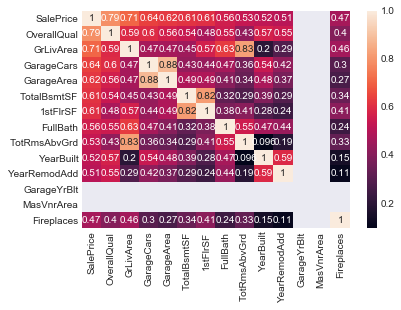

In [12]:
heatmap = sns.heatmap(corr_feat,cbar = True,annot = True,xticklabels=corr.values,yticklabels=corr.values)

In [13]:
train_na = train.isnull().sum() / len(train) * 100
train_na = train_na.sort_values(ascending = False)
train_na

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
FireplaceQu      47.260274
LotFrontage      17.739726
GarageType        5.547945
GarageCond        5.547945
GarageFinish      5.547945
GarageQual        5.547945
GarageYrBlt       5.547945
BsmtFinType2      2.602740
BsmtExposure      2.602740
BsmtQual          2.534247
BsmtCond          2.534247
BsmtFinType1      2.534247
MasVnrArea        0.547945
MasVnrType        0.547945
Electrical        0.068493
RoofMatl          0.000000
Exterior1st       0.000000
RoofStyle         0.000000
ExterQual         0.000000
Exterior2nd       0.000000
YearBuilt         0.000000
ExterCond         0.000000
Foundation        0.000000
YearRemodAdd      0.000000
SalePrice         0.000000
OverallCond       0.000000
                   ...    
GarageArea        0.000000
PavedDrive        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
3SsnPorch         0.000000
BsmtUnfSF         0.000000
S

In [14]:
train = train.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage'],axis = 1)

# Fill in Missing value 

In [15]:
train['GarageType'] = train['GarageType'].fillna('NA')

In [16]:
train['GarageType'].describe()

count       1460
unique         7
top       Attchd
freq         870
Name: GarageType, dtype: object

In [17]:
train['GarageCond'] = train['GarageCond'].fillna('NA')

In [18]:
train['GarageCond'].describe()

count     1460
unique       6
top         TA
freq      1326
Name: GarageCond, dtype: object

In [19]:
train['GarageFinish'] = train['GarageFinish'].fillna('NA')

In [20]:
train['GarageFinish'].describe()

count     1460
unique       4
top        Unf
freq       605
Name: GarageFinish, dtype: object

In [21]:
train['GarageQual'] = train['GarageQual'].fillna('NA')

In [22]:
train['GarageQual'].describe()

count     1460
unique       6
top         TA
freq      1311
Name: GarageQual, dtype: object

In [23]:
train['BsmtFinType2'] = train['BsmtFinType2'].fillna('NA')

In [24]:
train['BsmtFinType2'].describe()

count     1460
unique       7
top        Unf
freq      1256
Name: BsmtFinType2, dtype: object

In [25]:
train['BsmtExposure'] = train['BsmtExposure'].fillna('NA')

In [26]:
train['BsmtExposure'].describe()

count     1460
unique       5
top         No
freq       953
Name: BsmtExposure, dtype: object

In [27]:
train['BsmtQual'] = train['BsmtQual'].fillna('NA')

In [28]:
train['BsmtQual'].describe()

count     1460
unique       5
top         TA
freq       649
Name: BsmtQual, dtype: object

In [29]:
train['BsmtCond'] = train['BsmtCond'].fillna('NA')

In [30]:
train['BsmtCond'].describe()

count     1460
unique       5
top         TA
freq      1311
Name: BsmtCond, dtype: object

In [31]:
train['BsmtFinType1'] = train['BsmtFinType1'].fillna('NA')

In [32]:
train['BsmtFinType1'].describe()

count     1460
unique       7
top        Unf
freq       430
Name: BsmtFinType1, dtype: object

In [33]:
train['MasVnrArea'] = train['MasVnrArea'].fillna(0)

In [34]:
train['MasVnrArea'].describe()

count    1460.000000
mean      103.117123
std       180.731373
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [35]:
train['MasVnrType'] = train['MasVnrType'].fillna('None')

In [36]:
train['MasVnrType'].describe()

count     1460
unique       4
top       None
freq       872
Name: MasVnrType, dtype: object

In [37]:
train[['YearBuilt','GarageYrBlt']]

,YearBuilt,GarageYrBlt
0,2003,2003.0
1,1976,1976.0
2,2001,2001.0
3,1915,1998.0
4,2000,2000.0
5,1993,1993.0
6,2004,2004.0
7,1973,1973.0
8,1931,1931.0
9,1939,1939.0


In [38]:
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(train['YearBuilt'])

In [39]:
train['GarageYrBlt'].describe()

count    1460.000000
mean     1976.507534
std        26.306739
min      1872.000000
25%      1959.000000
50%      1978.000000
75%      2001.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [40]:
train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])

In [41]:
train['Electrical'].describe()

count      1460
unique        5
top       SBrkr
freq       1335
Name: Electrical, dtype: object

In [42]:
missing_ratio = train.isnull().sum()/ len(train)
missing_ratio = missing_ratio.sort_values(ascending = False)
missing_ratio

SalePrice        0.0
RoofStyle        0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
RoofMatl         0.0
YearRemodAdd     0.0
SaleCondition    0.0
YearBuilt        0.0
MSZoning         0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
                ... 
PavedDrive       0.0
WoodDeckSF       0.0
OpenPorchSF      0.0
EnclosedPorch    0.0
3SsnPorch        0.0
ScreenPorch      0.0
PoolArea         0.0
MiscVal          0.0
MoSold           0.0
YrSold           0.0
SaleType         0.0
GarageFinish     0.0
GarageYrBlt      0.0
GarageType       0.0
BsmtHalfBath     0.0
Electrical       0.0
1stFlrSF     

In [43]:
train.corr()['SalePrice'].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
GarageYrBlt      0.508043
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

# Get dummies

In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 non-null object
MasVnrArea       1460 non

In [45]:
all_data = pd.get_dummies(train,drop_first = True)

In [46]:
all_data.shape

(1460, 241)

In [47]:
all_data.head(0)

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial


In [48]:
train.shape

(1460, 74)

In [49]:
all_data.corr()[all_data.corr()['SalePrice'] > 0.4]['SalePrice'].sort_values(ascending = False)

SalePrice               1.000000
OverallQual             0.790982
GrLivArea               0.708624
GarageCars              0.640409
GarageArea              0.623431
TotalBsmtSF             0.613581
1stFlrSF                0.605852
FullBath                0.560664
TotRmsAbvGrd            0.533723
YearBuilt               0.522897
GarageYrBlt             0.508043
YearRemodAdd            0.507101
Foundation_PConc        0.497734
MasVnrArea              0.472614
Fireplaces              0.466929
ExterQual_Gd            0.452466
BsmtFinType1_GLQ        0.434597
Neighborhood_NridgHt    0.402149
Name: SalePrice, dtype: float64

# BoxCox transforamtion

## Target log transformation 

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "



 mu = 180921.20 and sigma = 79415.29



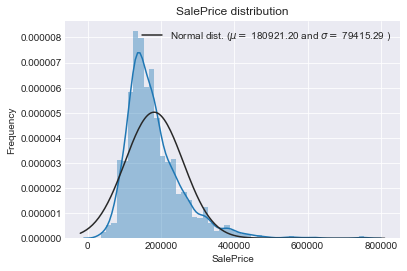

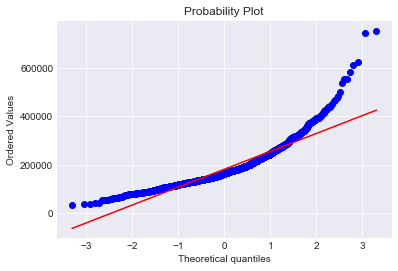

In [50]:
sns.distplot(all_data['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(all_data['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')


fig = plt.figure()
res = stats.probplot(all_data['SalePrice'], plot=plt)
plt.show()

In [51]:
all_data['SalePrice'] = np.log1p(all_data['SalePrice'])


 mu: 12.02 and sigma: 0.40



/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


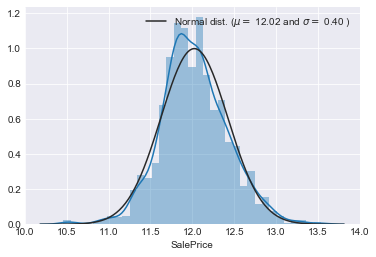

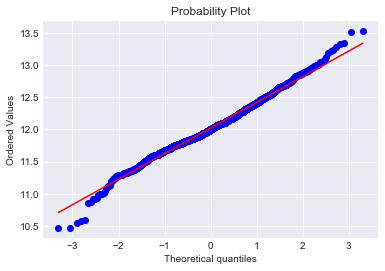

In [52]:
sns.distplot(all_data['SalePrice'], fit = norm)

(mu, sigma) = norm.fit(all_data['SalePrice'])
print('\n mu: {:.2f} and sigma: {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')

fig = plt.figure()
res = stats.probplot(all_data['SalePrice'], plot=plt)
plt.show()

In [53]:
all_data.corr()[all_data.corr()['SalePrice'] > 0.4]['SalePrice'].sort_values(ascending = False)

SalePrice            1.000000
OverallQual          0.817185
GrLivArea            0.700927
GarageCars           0.680625
GarageArea           0.650888
TotalBsmtSF          0.612134
1stFlrSF             0.596981
FullBath             0.594771
YearBuilt            0.586570
GarageYrBlt          0.568696
YearRemodAdd         0.565608
TotRmsAbvGrd         0.534422
Foundation_PConc     0.530840
ExterQual_Gd         0.509675
Fireplaces           0.489450
BsmtFinType1_GLQ     0.440764
MasVnrArea           0.426776
GarageType_Attchd    0.415787
KitchenQual_Gd       0.406601
Name: SalePrice, dtype: float64

### OverallQual


 mu: 6.10 and sigma: 1.38



/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


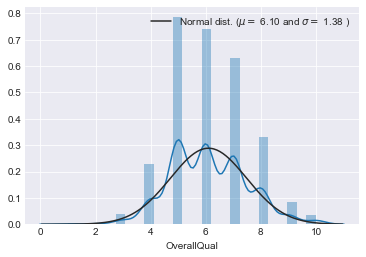

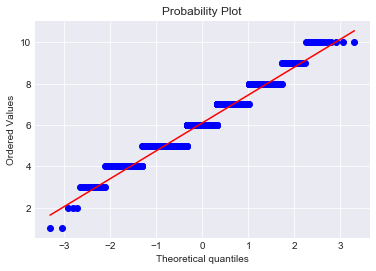

In [54]:
sns.distplot(all_data['OverallQual'], fit = norm)


(mu, sigma) = norm.fit(all_data['OverallQual'])
print('\n mu: {:.2f} and sigma: {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')


fig = plt.figure()
res = stats.probplot(all_data['OverallQual'], plot=plt)
plt.show()

In [55]:
corrcoef = []
lam = np.linspace(-0.5,0.5,101)
from scipy.special import boxcox1p
for a in lam:
    tmp = all_data['OverallQual']
    all_data['OverallQual'] = boxcox1p(all_data['OverallQual'],a)
    corrcoef.append(np.corrcoef(all_data['OverallQual'],all_data['SalePrice'])[1][0])
    all_data['OverallQual'] = tmp

x = pd.concat((pd.DataFrame(corrcoef,columns=['corr']),pd.DataFrame(lam,columns = ['lam'])),axis = 1)
x[x['corr'] == x['corr'].max()]['lam']


100    0.5
Name: lam, dtype: float64

In [56]:
max(corrcoef)

0.81264208089290768

### LotArea


 mu: 10516.83 and sigma: 9977.85



/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


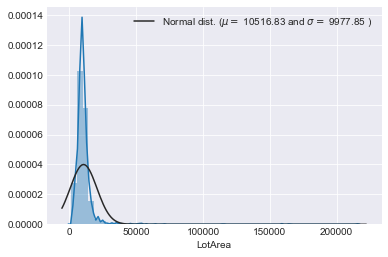

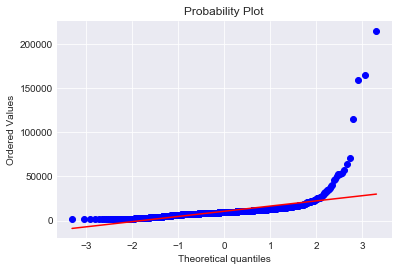

In [57]:
sns.distplot(all_data['LotArea'], fit = norm)

(mu, sigma) = norm.fit(all_data['LotArea'])
print('\n mu: {:.2f} and sigma: {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')

fig = plt.figure()
res = stats.probplot(all_data['LotArea'], plot=plt)
plt.show()

In [58]:
corrcoef = []
lam = np.linspace(-0.5,0.5,101)
from scipy.special import boxcox1p
for a in lam:
    tmp = all_data['LotArea']
    all_data['LotArea'] = boxcox1p(all_data['LotArea'],a)
    corrcoef.append(np.corrcoef(all_data['LotArea'],all_data['SalePrice'])[1][0])
    all_data['LotArea'] = tmp

x = pd.concat((pd.DataFrame(corrcoef,columns=['corr']),pd.DataFrame(lam,columns = ['lam'])),axis = 1)
x[x['corr'] == x['corr'].max()]['lam']



56    0.06
Name: lam, dtype: float64

In [59]:
max(corrcoef)

0.40037900230304052

In [60]:
all_data['LotArea'] = boxcox1p(all_data['LotArea'],0.06)

### GrLivArea


 mu: 1515.46 and sigma: 525.30



/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


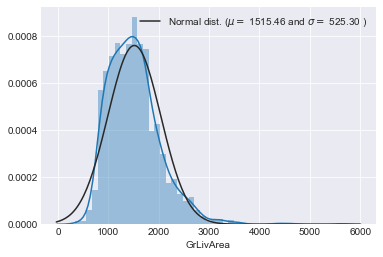

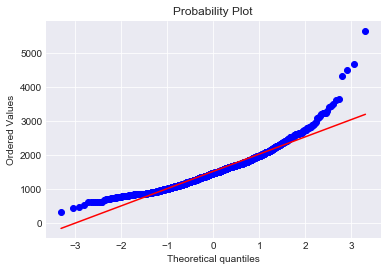

In [61]:
sns.distplot(all_data['GrLivArea'], fit = norm)

(mu, sigma) = norm.fit(all_data['GrLivArea'])
print('\n mu: {:.2f} and sigma: {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')

fig = plt.figure()
res = stats.probplot(all_data['GrLivArea'], plot=plt)
plt.show()

In [62]:
corrcoef = []
lam = np.linspace(-0.5,0.5,101)
from scipy.special import boxcox1p
for a in lam:
    tmp = all_data['GrLivArea']
    all_data['GrLivArea'] = boxcox1p(all_data['GrLivArea'],a)
    corrcoef.append(np.corrcoef(all_data['GrLivArea'],all_data['SalePrice'])[1][0])
    all_data['GrLivArea'] = tmp

x = pd.concat((pd.DataFrame(corrcoef,columns=['corr']),pd.DataFrame(lam,columns = ['lam'])),axis = 1)
x[x['corr'] == x['corr'].max()]['lam']



45   -0.05
Name: lam, dtype: float64

In [63]:
max(corrcoef)

0.73030879686378047

In [64]:
all_data['GrLivArea'] = boxcox1p(all_data['GrLivArea'],-0.05)

### GarageCars


 mu: 1.77 and sigma: 0.75



/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


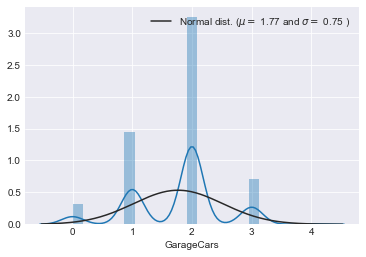

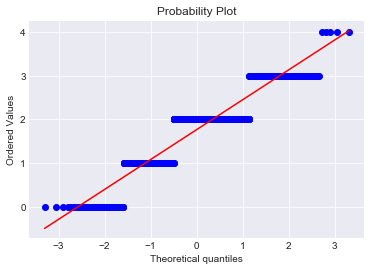

In [65]:
sns.distplot(all_data['GarageCars'], fit = norm)

(mu, sigma) = norm.fit(all_data['GarageCars'])
print('\n mu: {:.2f} and sigma: {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')

fig = plt.figure()
res = stats.probplot(all_data['GarageCars'], plot=plt)
plt.show()

In [66]:
corrcoef = []
lam = np.linspace(-1,1,201)
from scipy.special import boxcox1p
for a in lam:
    tmp = all_data['GarageCars']
    all_data['GarageCars'] = boxcox1p(all_data['GarageCars'],a)
    corrcoef.append(np.corrcoef(all_data['GarageCars'],all_data['SalePrice'])[1][0])
    all_data['GarageCars'] = tmp

x = pd.concat((pd.DataFrame(corrcoef,columns=['corr']),pd.DataFrame(lam,columns = ['lam'])),axis = 1)
x[x['corr'] == x['corr'].max()]['lam']

200    1.0
Name: lam, dtype: float64

In [67]:
max(corrcoef)

0.68062487265819127

### GarageArea


 mu: 472.98 and sigma: 213.73



/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


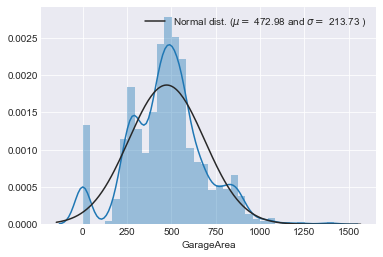

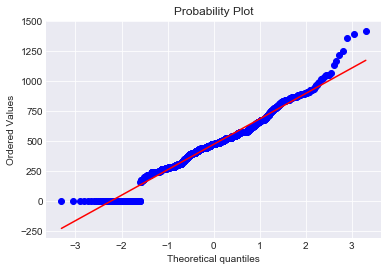

In [68]:
sns.distplot(all_data['GarageArea'], fit = norm)

(mu, sigma) = norm.fit(all_data['GarageArea'])
print('\n mu: {:.2f} and sigma: {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')

fig = plt.figure()
res = stats.probplot(all_data['GarageArea'], plot=plt)
plt.show()

In [69]:
corrcoef = []
lam = np.linspace(-1,1,101)
from scipy.special import boxcox1p
for a in lam:
    tmp = all_data['GarageArea']
    all_data['GarageArea'] = boxcox1p(all_data['GarageArea'],a)
    corrcoef.append(np.corrcoef(all_data['GarageArea'],all_data['SalePrice'])[0][1])
    all_data['GarageArea'] = tmp

x = pd.concat((pd.DataFrame(corrcoef,columns=['corr']),pd.DataFrame(lam,columns = ['lam'])),axis = 1)
x[x['corr'] == x['corr'].max()]['lam']

99    0.98
Name: lam, dtype: float64

In [70]:
max(corrcoef)

0.65093690189032827

In [71]:
all_data['GarageArea'] = boxcox1p(all_data['GarageArea'],0.98)

### TotalBsmtSF

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "



 mu: 1057.43 and sigma: 438.56



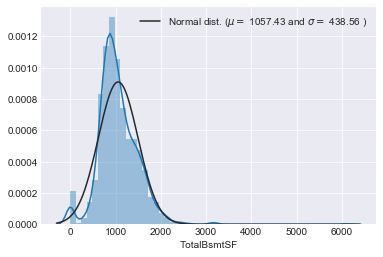

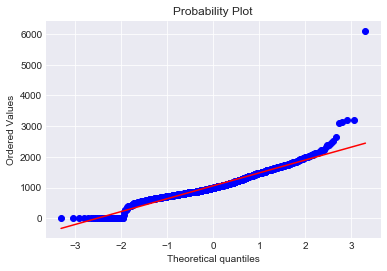

In [72]:
sns.distplot(all_data['TotalBsmtSF'], fit = norm)

(mu, sigma) = norm.fit(all_data['TotalBsmtSF'])
print('\n mu: {:.2f} and sigma: {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')

fig = plt.figure()
res = stats.probplot(all_data['TotalBsmtSF'], plot=plt)
plt.show()

In [73]:
corrcoef = []
lam = np.linspace(-1,1,201)
from scipy.special import boxcox1p
for a in lam:
    tmp = all_data['TotalBsmtSF']
    all_data['TotalBsmtSF'] = boxcox1p(all_data['TotalBsmtSF'],a)
    corrcoef.append(np.corrcoef(all_data['TotalBsmtSF'],all_data['SalePrice'])[0][1])
    all_data['TotalBsmtSF'] = tmp

x = pd.concat((pd.DataFrame(corrcoef,columns=['corr']),pd.DataFrame(lam,columns = ['lam'])),axis = 1)
x[x['corr'] == x['corr'].max()]['lam']

186    0.86
Name: lam, dtype: float64

In [74]:
max(corrcoef)

0.61556114882201207

In [75]:
all_data['TotalBsmtSF'] = boxcox1p(all_data['TotalBsmtSF'],0.86)

### 1stFlrSF

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "



 mu: 1162.63 and sigma: 386.46



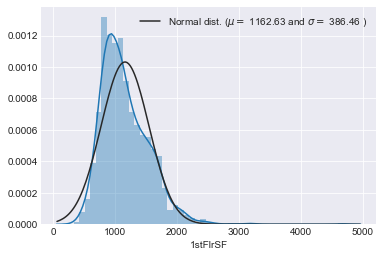

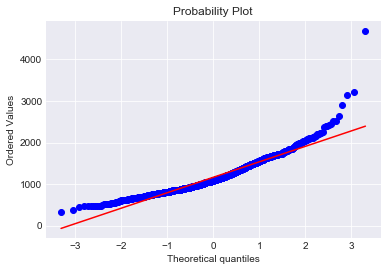

In [76]:
sns.distplot(all_data['1stFlrSF'], fit = norm)

(mu, sigma) = norm.fit(all_data['1stFlrSF'])
print('\n mu: {:.2f} and sigma: {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')

fig = plt.figure()
res = stats.probplot(all_data['1stFlrSF'], plot=plt)
plt.show()

In [77]:
corrcoef = []
lam = np.linspace(-1,1,201)
from scipy.special import boxcox1p
for a in lam:
    tmp = all_data['1stFlrSF']
    all_data['1stFlrSF'] = boxcox1p(all_data['1stFlrSF'],a)
    corrcoef.append(np.corrcoef(all_data['1stFlrSF'],all_data['SalePrice'])[0][1])
    all_data['1stFlrSF'] = tmp

x = pd.concat((pd.DataFrame(corrcoef,columns=['corr']),pd.DataFrame(lam,columns = ['lam'])),axis = 1)
x[x['corr'] == x['corr'].max()]['lam']

124    0.24
Name: lam, dtype: float64

In [78]:
max(corrcoef)

0.61006857131540992

In [79]:
all_data['1stFlrSF'] = boxcox1p(all_data['1stFlrSF'],0.24)

### FullBath


 mu: 1.57 and sigma: 0.55



/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


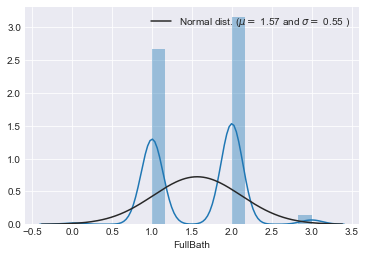

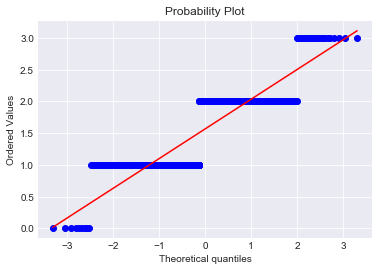

In [80]:
sns.distplot(all_data['FullBath'], fit = norm)

(mu, sigma) = norm.fit(all_data['FullBath'])
print('\n mu: {:.2f} and sigma: {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')

fig = plt.figure()
res = stats.probplot(all_data['FullBath'], plot=plt)
plt.show()

In [81]:
corrcoef = []
lam = np.linspace(-1,1,201)
from scipy.special import boxcox1p
for a in lam:
    tmp = all_data['FullBath']
    all_data['FullBath'] = boxcox1p(all_data['FullBath'],a)
    corrcoef.append(np.corrcoef(all_data['FullBath'],all_data['SalePrice'])[0][1])
    all_data['FullBath'] = tmp

x = pd.concat((pd.DataFrame(corrcoef,columns=['corr']),pd.DataFrame(lam,columns = ['lam'])),axis = 1)
x[x['corr'] == x['corr'].max()]['lam']

200    1.0
Name: lam, dtype: float64

In [82]:
max(corrcoef)

0.5947706649972534

### YearBuilt


 mu: 1971.27 and sigma: 30.19



/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


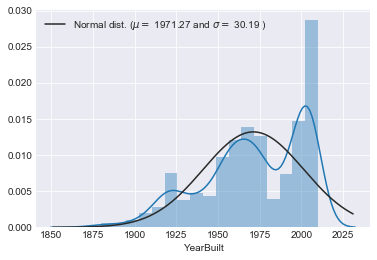

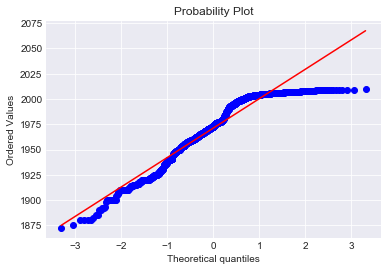

In [83]:
sns.distplot(all_data['YearBuilt'], fit = norm)

(mu, sigma) = norm.fit(all_data['YearBuilt'])
print('\n mu: {:.2f} and sigma: {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')

fig = plt.figure()
res = stats.probplot(all_data['YearBuilt'], plot=plt)
plt.show()

In [84]:
corrcoef = []
lam = np.linspace(-2,3,501)
from scipy.special import boxcox1p
for a in lam:
    tmp = all_data['YearBuilt']
    all_data['YearBuilt'] = boxcox1p(all_data['YearBuilt'],a)
    corrcoef.append(np.corrcoef(all_data['YearBuilt'],all_data['SalePrice'])[0][1])
    all_data['YearBuilt'] = tmp

x = pd.concat((pd.DataFrame(corrcoef,columns=['corr']),pd.DataFrame(lam,columns = ['lam'])),axis = 1)
x[x['corr'] == x['corr'].max()]['lam']

500    3.0
Name: lam, dtype: float64

In [85]:
max(corrcoef)

0.59065106102275944

### GarageYrBlt

In [86]:
all_data['GarageYrBlt'] = all_data['GarageYrBlt'].astype(int)


 mu: 1976.51 and sigma: 26.30



/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


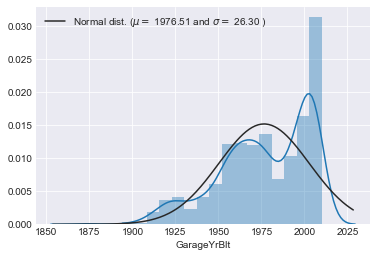

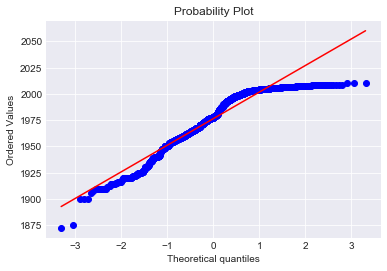

In [87]:
sns.distplot(all_data['GarageYrBlt'], fit = norm)

(mu, sigma) = norm.fit(all_data['GarageYrBlt'])
print('\n mu: {:.2f} and sigma: {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')

fig = plt.figure()
res = stats.probplot(all_data['GarageYrBlt'], plot=plt)
plt.show()

In [88]:
corrcoef = []
lam = np.linspace(-1,1,201)
from scipy.special import boxcox1p
for a in lam:
    tmp = all_data['GarageYrBlt']
    all_data['GarageYrBlt'] = boxcox1p(all_data['GarageYrBlt'],a)
    corrcoef.append(np.corrcoef(all_data['GarageYrBlt'],all_data['SalePrice'])[0][1])
    all_data['GarageYrBlt'] = tmp

x = pd.concat((pd.DataFrame(corrcoef,columns=['corr']),pd.DataFrame(lam,columns = ['lam'])),axis = 1)
x[x['corr'] == x['corr'].max()]['lam']



200    1.0
Name: lam, dtype: float64

### YearRemodAdd


 mu: 1984.87 and sigma: 20.64



/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


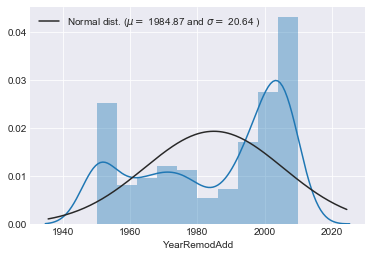

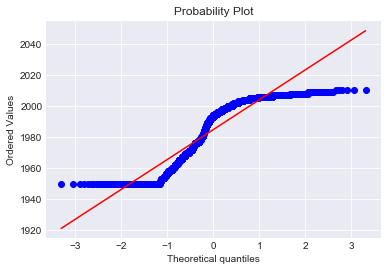

In [89]:
sns.distplot(all_data['YearRemodAdd'], fit = norm)

(mu, sigma) = norm.fit(all_data['YearRemodAdd'])
print('\n mu: {:.2f} and sigma: {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')

fig = plt.figure()
res = stats.probplot(all_data['YearRemodAdd'], plot=plt)
plt.show()

In [90]:
corrcoef = []
lam = np.linspace(-1,1,201)
from scipy.special import boxcox1p
for a in lam:
    tmp = all_data['YearRemodAdd']
    all_data['YearRemodAdd'] = boxcox1p(all_data['YearRemodAdd'],a)
    corrcoef.append(np.corrcoef(all_data['YearRemodAdd'],all_data['SalePrice'])[0][1])
    all_data['YearRemodAdd'] = tmp

x = pd.concat((pd.DataFrame(corrcoef,columns=['corr']),pd.DataFrame(lam,columns = ['lam'])),axis = 1)
x[x['corr'] == x['corr'].max()]['lam']

200    1.0
Name: lam, dtype: float64

### TotRmsAbvGrd


 mu: 6.52 and sigma: 1.62



/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


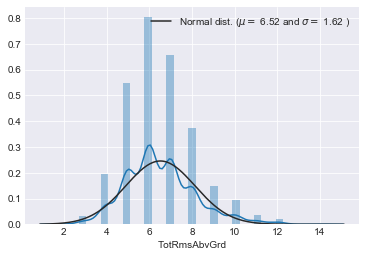

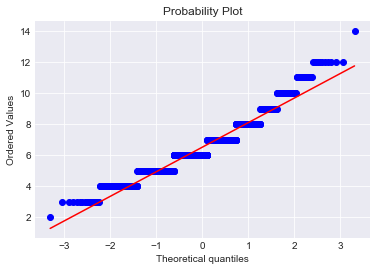

In [91]:
sns.distplot(all_data['TotRmsAbvGrd'], fit = norm)

(mu, sigma) = norm.fit(all_data['TotRmsAbvGrd'])
print('\n mu: {:.2f} and sigma: {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')

fig = plt.figure()
res = stats.probplot(all_data['TotRmsAbvGrd'], plot=plt)
plt.show()

In [92]:
corrcoef = []
lam = np.linspace(-1,1,201)
from scipy.special import boxcox1p
for a in lam:
    tmp = all_data['TotRmsAbvGrd']
    all_data['TotRmsAbvGrd'] = boxcox1p(all_data['TotRmsAbvGrd'],a)
    corrcoef.append(np.corrcoef(all_data['TotRmsAbvGrd'],all_data['SalePrice'])[0][1])
    all_data['TotRmsAbvGrd'] = tmp

x = pd.concat((pd.DataFrame(corrcoef,columns=['corr']),pd.DataFrame(lam,columns = ['lam'])),axis = 1)
x[x['corr'] == x['corr'].max()]['lam']

114    0.14
Name: lam, dtype: float64

In [93]:
max(corrcoef)

0.54016366729287491

In [94]:
all_data['TotRmsAbvGrd'] = boxcox1p(all_data['TotRmsAbvGrd'],0.14)

### Foundation_PConc


 mu: 0.44 and sigma: 0.50



/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


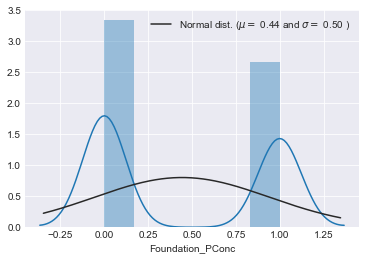

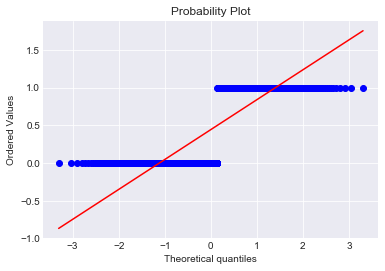

In [95]:
sns.distplot(all_data['Foundation_PConc'], fit = norm)

(mu, sigma) = norm.fit(all_data['Foundation_PConc'])
print('\n mu: {:.2f} and sigma: {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')

fig = plt.figure()
res = stats.probplot(all_data['Foundation_PConc'], plot=plt)
plt.show()

In [96]:
corrcoef = []
lam = np.linspace(-1,1,201)
from scipy.special import boxcox1p
for a in lam:
    tmp = all_data['Foundation_PConc']
    all_data['Foundation_PConc'] = boxcox1p(all_data['Foundation_PConc'],a)
    corrcoef.append(np.corrcoef(all_data['Foundation_PConc'],all_data['SalePrice'])[0][1])
    all_data['Foundation_PConc'] = tmp

x = pd.concat((pd.DataFrame(corrcoef,columns=['corr']),pd.DataFrame(lam,columns = ['lam'])),axis = 1)
x[x['corr'] == x['corr'].max()]['lam']

8     -0.92
33    -0.67
146    0.46
Name: lam, dtype: float64

In [97]:
max(corrcoef)

0.53084015052703248

In [98]:
all_data['Foundation_PConc'] = boxcox1p(all_data['Foundation_PConc'],0.46)

### ExterQual_Gd


 mu: 0.33 and sigma: 0.47



/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


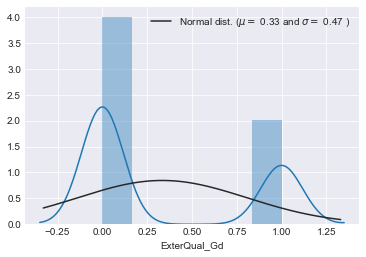

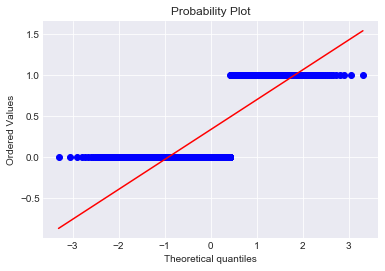

In [99]:
sns.distplot(all_data['ExterQual_Gd'], fit = norm)

(mu, sigma) = norm.fit(all_data['ExterQual_Gd'])
print('\n mu: {:.2f} and sigma: {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')

fig = plt.figure()
res = stats.probplot(all_data['ExterQual_Gd'], plot=plt)
plt.show()

In [100]:
corrcoef = []
lam = np.linspace(-1,1,201)
from scipy.special import boxcox1p
for a in lam:
    tmp = all_data['FullBath']
    all_data['ExterQual_Gd'] = boxcox1p(all_data['ExterQual_Gd'],a)
    corrcoef.append(np.corrcoef(all_data['ExterQual_Gd'],all_data['SalePrice'])[0][1])
    all_data['ExterQual_Gd'] = tmp

x = pd.concat((pd.DataFrame(corrcoef,columns=['corr']),pd.DataFrame(lam,columns = ['lam'])),axis = 1)
x[x['corr'] == x['corr'].max()]['lam']

200    1.0
Name: lam, dtype: float64

### Fireplaces


 mu: 0.61 and sigma: 0.64



/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


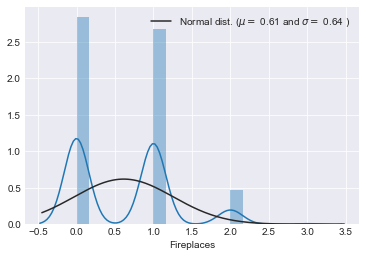

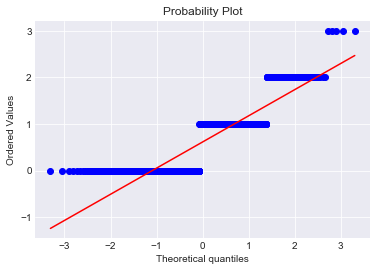

In [101]:
sns.distplot(all_data['Fireplaces'], fit = norm)

(mu, sigma) = norm.fit(all_data['Fireplaces'])
print('\n mu: {:.2f} and sigma: {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')

fig = plt.figure()
res = stats.probplot(all_data['Fireplaces'], plot=plt)
plt.show()

In [102]:
corrcoef = []
lam = np.linspace(-1,1,201)
from scipy.special import boxcox1p
for a in lam:
    tmp = all_data['Fireplaces']
    all_data['Fireplaces'] = boxcox1p(all_data['Fireplaces'],a)
    corrcoef.append(np.corrcoef(all_data['Fireplaces'],all_data['SalePrice'])[0][1])
    all_data['Fireplaces'] = tmp

x = pd.concat((pd.DataFrame(corrcoef,columns=['corr']),pd.DataFrame(lam,columns = ['lam'])),axis = 1)
x[x['corr'] == x['corr'].max()]['lam']

0   -1.0
Name: lam, dtype: float64

### BsmtFinType1_GLQ


 mu: 0.29 and sigma: 0.45



/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


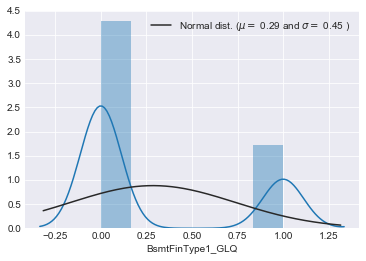

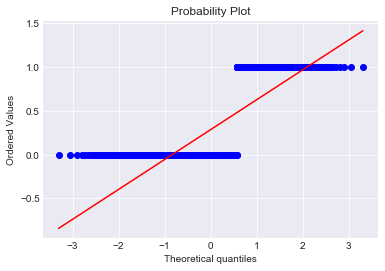

In [103]:
sns.distplot(all_data['BsmtFinType1_GLQ'], fit = norm)

(mu, sigma) = norm.fit(all_data['BsmtFinType1_GLQ'])
print('\n mu: {:.2f} and sigma: {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')

fig = plt.figure()
res = stats.probplot(all_data['BsmtFinType1_GLQ'], plot=plt)
plt.show()

In [104]:
corrcoef = []
lam = np.linspace(-1,1,201)
from scipy.special import boxcox1p
for a in lam:
    tmp = all_data['BsmtFinType1_GLQ']
    all_data['BsmtFinType1_GLQ'] = boxcox1p(all_data['BsmtFinType1_GLQ'],a)
    corrcoef.append(np.corrcoef(all_data['BsmtFinType1_GLQ'],all_data['SalePrice'])[0][1])
    all_data['BsmtFinType1_GLQ'] = tmp

x = pd.concat((pd.DataFrame(corrcoef,columns=['corr']),pd.DataFrame(lam,columns = ['lam'])),axis = 1)
x[x['corr'] == x['corr'].max()]['lam']

174    0.74
Name: lam, dtype: float64

In [105]:
max(corrcoef)

0.44076353166004267

In [106]:
all_data['BsmtFinType1_GLQ'] = boxcox1p(all_data['BsmtFinType1_GLQ'],0.74)

### MasVnrArea


 mu: 103.12 and sigma: 180.67



/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


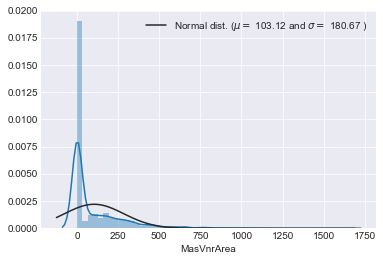

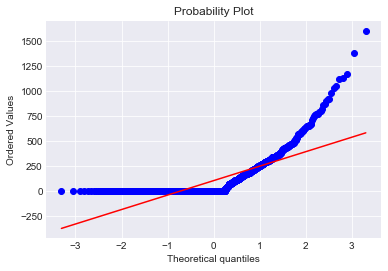

In [107]:
sns.distplot(all_data['MasVnrArea'], fit = norm)

(mu, sigma) = norm.fit(all_data['MasVnrArea'])
print('\n mu: {:.2f} and sigma: {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')

fig = plt.figure()
res = stats.probplot(all_data['MasVnrArea'], plot=plt)
plt.show()

In [108]:
corrcoef = []
lam = np.linspace(-1,1,201)
from scipy.special import boxcox1p
for a in lam:
    tmp = all_data['MasVnrArea']
    all_data['MasVnrArea'] = boxcox1p(all_data['MasVnrArea'],a)
    corrcoef.append(np.corrcoef(all_data['MasVnrArea'],all_data['SalePrice'])[0][1])
    all_data['MasVnrArea'] = tmp

x = pd.concat((pd.DataFrame(corrcoef,columns=['corr']),pd.DataFrame(lam,columns = ['lam'])),axis = 1)
x[x['corr'] == x['corr'].max()]['lam']

0   -1.0
Name: lam, dtype: float64

### GarageType_Attchd


 mu: 0.60 and sigma: 0.49



/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


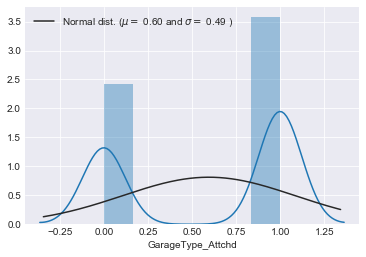

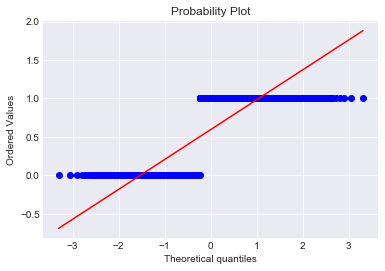

In [109]:
sns.distplot(all_data['GarageType_Attchd'], fit = norm)

(mu, sigma) = norm.fit(all_data['GarageType_Attchd'])
print('\n mu: {:.2f} and sigma: {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')

fig = plt.figure()
res = stats.probplot(all_data['GarageType_Attchd'], plot=plt)
plt.show()

In [110]:
corrcoef = []
lam = np.linspace(-1,1,201)
from scipy.special import boxcox1p
for a in lam:
    tmp = all_data['GarageType_Attchd']
    all_data['GarageType_Attchd'] = boxcox1p(all_data['GarageType_Attchd'],a)
    corrcoef.append(np.corrcoef(all_data['GarageType_Attchd'],all_data['SalePrice'])[0][1])
    all_data['GarageType_Attchd'] = tmp

x = pd.concat((pd.DataFrame(corrcoef,columns=['corr']),pd.DataFrame(lam,columns = ['lam'])),axis = 1)
x[x['corr'] == x['corr'].max()]['lam']

29    -0.71
43    -0.57
65    -0.35
121    0.21
154    0.54
Name: lam, dtype: float64

In [111]:
max(corrcoef)

0.41578689906674304

In [112]:
all_data['GarageType_Attchd'] = boxcox1p(all_data['GarageType_Attchd'],0.54)

### KitchenQual_Gd


 mu: 0.40 and sigma: 0.49



/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


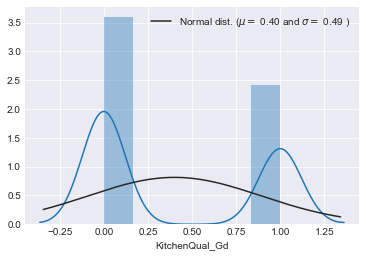

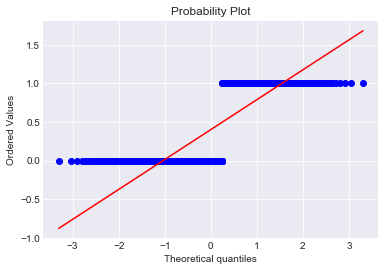

In [113]:
sns.distplot(all_data['KitchenQual_Gd'], fit = norm)

(mu, sigma) = norm.fit(all_data['KitchenQual_Gd'])
print('\n mu: {:.2f} and sigma: {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')

fig = plt.figure()
res = stats.probplot(all_data['KitchenQual_Gd'], plot=plt)
plt.show()

In [114]:
corrcoef = []
lam = np.linspace(-1,1,201)
from scipy.special import boxcox1p
for a in lam:
    tmp = all_data['KitchenQual_Gd']
    all_data['KitchenQual_Gd'] = boxcox1p(all_data['KitchenQual_Gd'],a)
    corrcoef.append(np.corrcoef(all_data['KitchenQual_Gd'],all_data['SalePrice'])[0][1])
    all_data['KitchenQual_Gd'] = tmp

x = pd.concat((pd.DataFrame(corrcoef,columns=['corr']),pd.DataFrame(lam,columns = ['lam'])),axis = 1)
x[x['corr'] == x['corr'].max()]['lam']

35   -0.65
Name: lam, dtype: float64

In [115]:
max(corrcoef)

0.40660132140416999

In [116]:
all_data['KitchenQual_Gd'] = boxcox1p(all_data['KitchenQual_Gd'],-0.65)

In [117]:
all_data.corr()[all_data.corr()['SalePrice'] > 0.4]['SalePrice'].sort_values(ascending = False)

SalePrice            1.000000
OverallQual          0.817185
GrLivArea            0.730309
GarageCars           0.680625
GarageArea           0.650937
TotalBsmtSF          0.615561
1stFlrSF             0.610069
ExterQual_Gd         0.594771
FullBath             0.594771
YearBuilt            0.586570
GarageYrBlt          0.568696
YearRemodAdd         0.565608
TotRmsAbvGrd         0.540164
Foundation_PConc     0.530840
Fireplaces           0.489450
BsmtFinType1_GLQ     0.440764
GarageType_Attchd    0.415787
KitchenQual_Gd       0.406601
LotArea              0.400379
Name: SalePrice, dtype: float64

# Linear Regression Model Test

In [118]:
X = all_data[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','ExterQual_Gd',
              'FullBath','YearBuilt','GarageYrBlt','YearRemodAdd','TotRmsAbvGrd','Foundation_PConc',
              'Fireplaces','BsmtFinType1_GLQ','GarageType_Attchd','KitchenQual_Gd','LotArea']]

In [119]:
y = all_data['SalePrice']

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [122]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [123]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [124]:
print(lm.intercept_)

-0.717097433243


In [125]:
predictions = lm.predict(X_test)

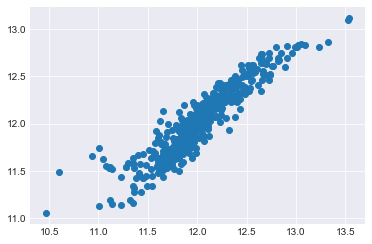

In [126]:
plt.scatter(y_test,predictions)

In [127]:
from sklearn import metrics

In [128]:
print('MAE: ', metrics.mean_absolute_error(y_test,predictions))
print('MSE: ', metrics.mean_squared_error(y_test,predictions))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE:  0.113099563729
MSE:  0.0244808253073
RMSE:  0.156463495127


In [129]:
from sklearn.metrics import classification_report, confusion_matrix

## Final Model

In [130]:
X_train = all_data[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','ExterQual_Gd',
              'FullBath','YearBuilt','GarageYrBlt','YearRemodAdd','TotRmsAbvGrd','Foundation_PConc',
              'Fireplaces','BsmtFinType1_GLQ','GarageType_Attchd','KitchenQual_Gd','LotArea']]

In [131]:
y_train = all_data['SalePrice']

In [132]:
lm_final = LinearRegression()

In [133]:
lm_final.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# Test data cleaning 

In [134]:
test_missing_ratio = test.isnull().sum()/len(test) *100
test_missing_ratio = test_missing_ratio.sort_values(ascending = False)
test_missing_ratio = pd.DataFrame(test_missing_ratio)

In [135]:
test_missing_ratio.loc[['OverallQual',
'GrLivArea',
'GarageCars',
'GarageArea',
'TotalBsmtSF',
'1stFlrSF',
'ExterQual',
'FullBath'
,'YearBuilt',
'GarageYrBlt',
'YearRemodAdd',
'TotRmsAbvGrd',
'Foundation',
'Fireplaces',
'BsmtFinType1'
,'GarageType',
'KitchenQual',
'LotArea']]

,0
OverallQual,0.000000
GrLivArea,0.000000
GarageCars,0.068540
GarageArea,0.068540
TotalBsmtSF,0.068540
1stFlrSF,0.000000
ExterQual,0.000000
FullBath,0.000000
YearBuilt,0.000000
GarageYrBlt,5.346127


In [136]:
test['GarageType'] = test['GarageType'].fillna('NA')

In [137]:
test['GarageType'].describe()

count       1459
unique         7
top       Attchd
freq         853
Name: GarageType, dtype: object

In [138]:
test['BsmtFinType1'] = test['BsmtFinType1'].fillna('NA')

In [139]:
test['BsmtFinType1'].describe()

count     1459
unique       7
top        GLQ
freq       431
Name: BsmtFinType1, dtype: object

In [140]:
test['GarageYrBlt'] = test['GarageYrBlt'].fillna(test['YearBuilt'])

In [141]:
test['GarageYrBlt'].describe()

count    1459.000000
mean     1976.000000
std        27.761773
min      1890.000000
25%      1958.000000
50%      1978.000000
75%      2002.000000
max      2207.000000
Name: GarageYrBlt, dtype: float64

In [142]:
test['KitchenQual'] = test['KitchenQual'].fillna(test['KitchenQual'].mode()[0])

In [143]:
test['GarageCars'] = test['GarageCars'].fillna(test['GarageCars'].mode()[0])

In [144]:
test['GarageCars'].describe()

count    1459.000000
mean        1.766278
std         0.775703
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         5.000000
Name: GarageCars, dtype: float64

In [145]:
test['GarageArea'] = test['GarageArea'].fillna(test['GarageArea'].mode()[0])

In [146]:
test['GarageArea'].describe()

count    1459.000000
mean      472.444825
std       217.326902
min         0.000000
25%       317.500000
50%       480.000000
75%       576.000000
max      1488.000000
Name: GarageArea, dtype: float64

In [147]:
test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].mode()[0])

In [148]:
test['TotalBsmtSF'].describe()

count    1459.000000
mean     1045.400960
std       443.592976
min         0.000000
25%       784.000000
50%       988.000000
75%      1304.000000
max      5095.000000
Name: TotalBsmtSF, dtype: float64

In [149]:
test_missing_ratio = test.isnull().sum()/len(test) *100
test_missing_ratio = test_missing_ratio.sort_values(ascending = False)
test_missing_ratio = pd.DataFrame(test_missing_ratio)

In [150]:
test_missing_ratio.loc[['OverallQual',
'GrLivArea',
'GarageCars',
'GarageArea',
'TotalBsmtSF',
'1stFlrSF',
'ExterQual',
'FullBath'
,'YearBuilt',
'GarageYrBlt',
'YearRemodAdd',
'TotRmsAbvGrd',
'Foundation',
'Fireplaces',
'BsmtFinType1'
,'GarageType',
'KitchenQual',
'LotArea']]

,0
OverallQual,0.0
GrLivArea,0.0
GarageCars,0.0
GarageArea,0.0
TotalBsmtSF,0.0
1stFlrSF,0.0
ExterQual,0.0
FullBath,0.0
YearBuilt,0.0
GarageYrBlt,0.0


## Get Dummies 

In [151]:
test = test.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage'],axis = 1)

In [152]:
test_all = pd.get_dummies(test,drop_first= True)

In [153]:
test_all[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','ExterQual_Gd',
              'FullBath','YearBuilt','GarageYrBlt','YearRemodAdd','TotRmsAbvGrd','Foundation_PConc',
              'Fireplaces','BsmtFinType1_GLQ','GarageType_Attchd','KitchenQual_Gd','LotArea']]

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,ExterQual_Gd,FullBath,YearBuilt,GarageYrBlt,YearRemodAdd,TotRmsAbvGrd,Foundation_PConc,Fireplaces,BsmtFinType1_GLQ,GarageType_Attchd,KitchenQual_Gd,LotArea
0,5,896,1.0,730.0,882.0,896,0,1,1961,1961.0,1961,5,0,0,0,1,0,11622
1,6,1329,1.0,312.0,1329.0,1329,0,1,1958,1958.0,1958,6,0,0,0,1,1,14267
2,5,1629,2.0,482.0,928.0,928,0,2,1997,1997.0,1998,6,1,1,1,1,0,13830
3,6,1604,2.0,470.0,926.0,926,0,2,1998,1998.0,1998,7,1,1,1,1,1,9978
4,8,1280,2.0,506.0,1280.0,1280,1,2,1992,1992.0,1992,5,1,0,0,1,1,5005
5,6,1655,2.0,440.0,763.0,763,0,2,1993,1993.0,1994,7,1,1,0,1,0,10000
6,6,1187,2.0,420.0,1168.0,1187,0,2,1992,1992.0,2007,6,1,0,0,1,0,7980
7,6,1465,2.0,393.0,789.0,789,0,2,1998,1998.0,1998,7,1,1,0,1,0,8402
8,7,1341,2.0,506.0,1300.0,1341,0,1,1990,1990.0,1990,5,1,1,1,1,1,10176
9,4,882,2.0,525.0,882.0,882,0,1,1970,1970.0,1970,4,0,0,0,1,0,8400


#  Test data BoxCox

### LotArea 

In [154]:
test_all['LotArea'] = boxcox1p(test_all['LotArea'],0.06)

### GrLivArea

In [155]:
test_all['GrLivArea'] = boxcox1p(test_all['GrLivArea'],-0.05)

### GarageCars

### GarageArea

In [156]:
test_all['GarageArea'] = boxcox1p(test_all['GarageArea'],0.98)

### TotalBsmtSF

In [157]:
test_all['TotalBsmtSF'] = boxcox1p(test_all['TotalBsmtSF'],0.86)

### 1stFlrSF

In [158]:
test_all['1stFlrSF'] = boxcox1p(test_all['1stFlrSF'],0.24)

### FullBath

### YearBuilt

### GarageYrBlt

### YearRemodAdd

### TotRmsAbvGrd

In [159]:
test_all['TotRmsAbvGrd'] = boxcox1p(test_all['TotRmsAbvGrd'],0.14)

### Foundation_PConc

In [160]:
test_all['Foundation_PConc'] = boxcox1p(test_all['Foundation_PConc'],0.46)

### ExterQual_Gd

### Fireplaces

### BsmtFinType1_GLQ

In [161]:
test_all['BsmtFinType1_GLQ'] = boxcox1p(test_all['BsmtFinType1_GLQ'],0.74)

### MasVnrArea

### GarageType_Attchd

In [162]:
test_all['GarageType_Attchd'] = boxcox1p(test_all['GarageType_Attchd'],0.54)

### KitchenQual_Gd

In [163]:
test_all['KitchenQual_Gd'] = boxcox1p(test_all['KitchenQual_Gd'],-0.65)

# Prediction 

In [164]:
X_test = test_all[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','ExterQual_Gd',
              'FullBath','YearBuilt','GarageYrBlt','YearRemodAdd','TotRmsAbvGrd','Foundation_PConc',
              'Fireplaces','BsmtFinType1_GLQ','GarageType_Attchd','KitchenQual_Gd','LotArea']]

In [165]:
test_prediction = lm_final.predict(X_test)

In [166]:
test_prediction

array([ 11.65375163,  11.90644266,  12.16282242, ...,  12.00443443,
        11.74285431,  12.35454894])

In [167]:
test_prediction = np.exp(test_prediction)

In [172]:
test_prediction.shape

(1459,)

In [173]:
test['Id'].count()

1459

In [187]:
test_SalePrice = pd.DataFrame(test_prediction,columns = ['SalePrice'])

In [188]:
Submission = pd.concat((test['Id'],pd.DataFrame(test_prediction,columns = ['SalePrice'])),axis = 1)

In [191]:
np.savetxt("Submission.csv",Submission)